In [1]:
import numpy as np
import torch
from torch.utils.data import DataLoader, Dataset
from data_generation import *
from torchvision import transforms
from PIL import Image, ImageDraw

Parameters
- Initial speed
- Initial angle
- Initial position
- Gravity
- Restitution coefficient

Curriculum Learning

First
- restitution = 1
- gravity = 0
- initial speed ~ uniform[5, 10]
- initial angle ~ uniform[0, 2pi]
- initial position ~ uniform across the screen

Second
- gravity = 7.5

Third
- gravity ~ uniform[5.0, 10.0]

Fourth
- restitution ~ uniform[0.5, 1]

Save the model after each of these transitions

In [33]:
def get_distances(positions):
    """
    euclidean distances between consecutive points
    """
    distances = []
    for i in range(len(positions) - 1):
        tuple_subtraction = (
            positions[i + 1][0] - positions[i][0],
            positions[i + 1][1] - positions[i][1],
        )
        distances.append(np.linalg.norm(tuple_subtraction))
    return distances

In [30]:
distances = []
for _ in range(100):
    sequence, positions = generate_random_sequence(
        sequence_length=10,
        speed_min=10,
        speed_max=15,
        direction_min=0,
        direction_max=2 * np.pi,
        position_x_min=0,
        position_x_max=16,
        position_y_min=0,
        position_y_max=16,
        gravity_min=1,
        gravity_max=3,
        restitution_min=0.5,
        restitution_max=0.8,
    )
    distances += get_distances(positions)

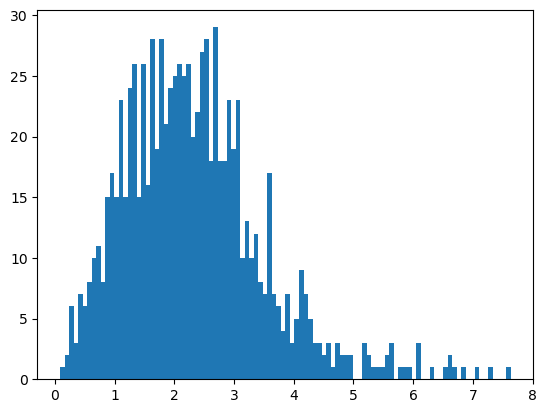

In [31]:
# plot distribution of distances
plt.hist(distances, bins=100)
plt.show()

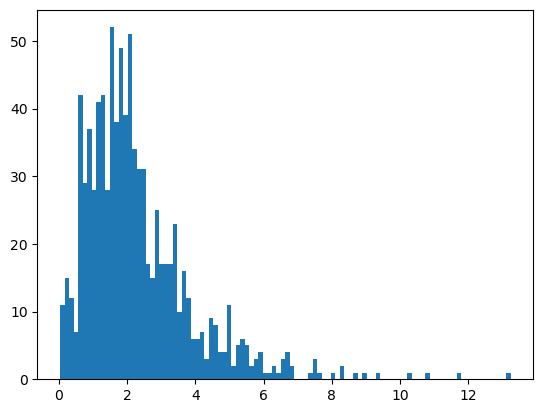

In [27]:
# plot distribution of distances
plt.hist(distances, bins=100)
plt.show()

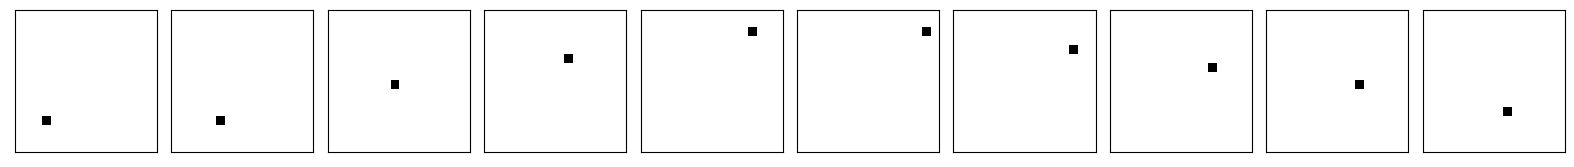

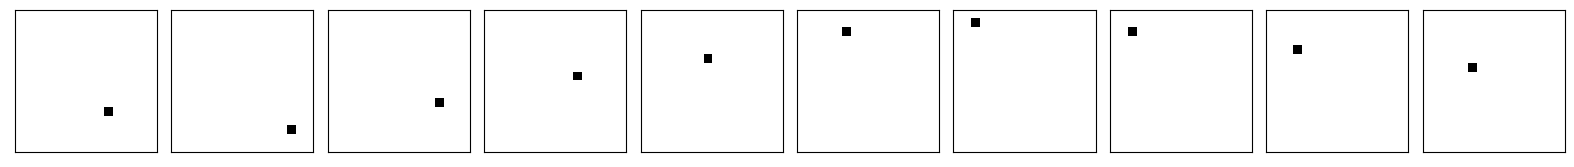

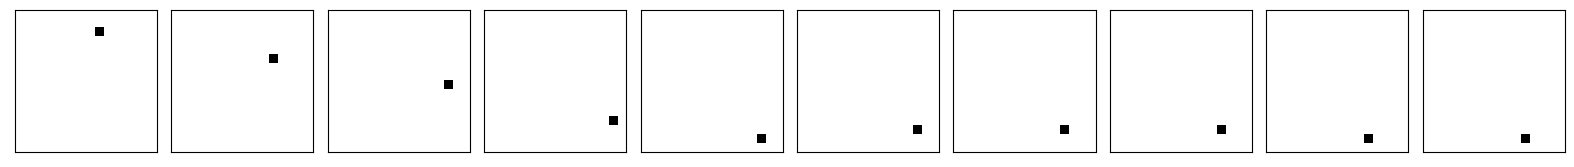

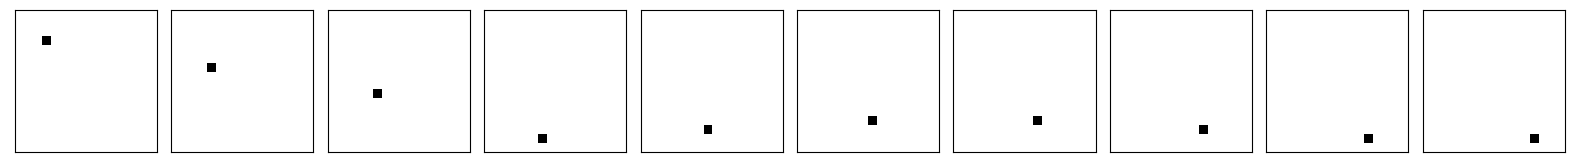

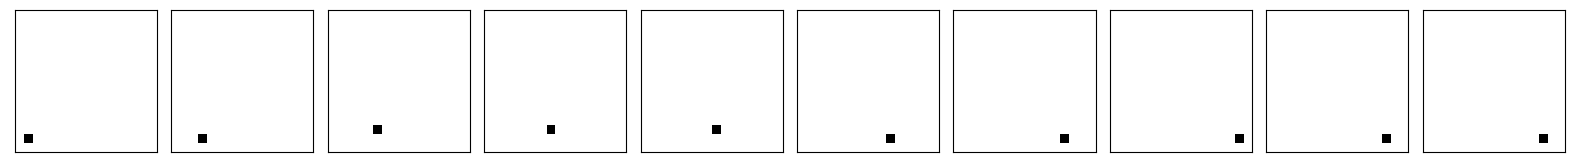

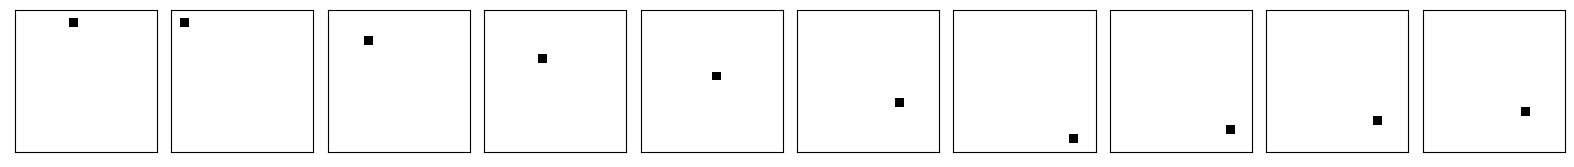

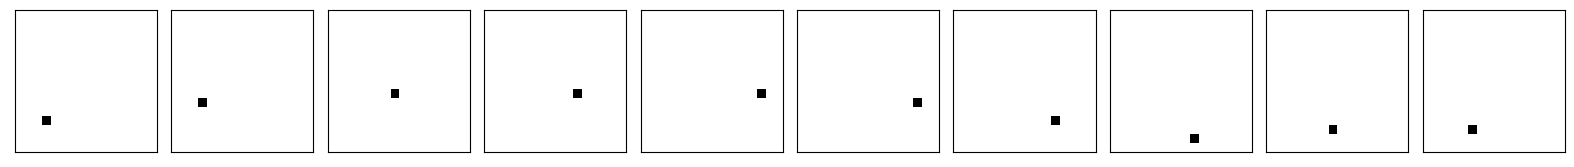

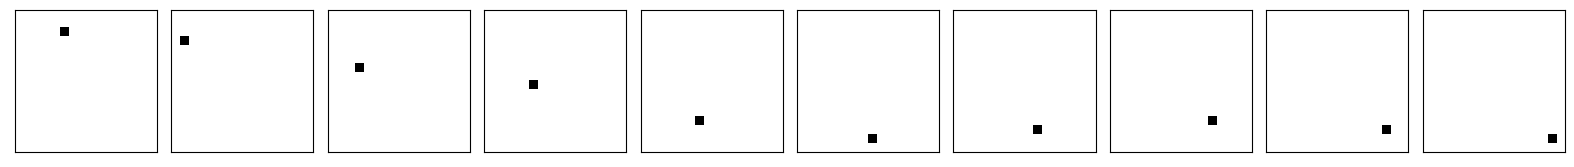

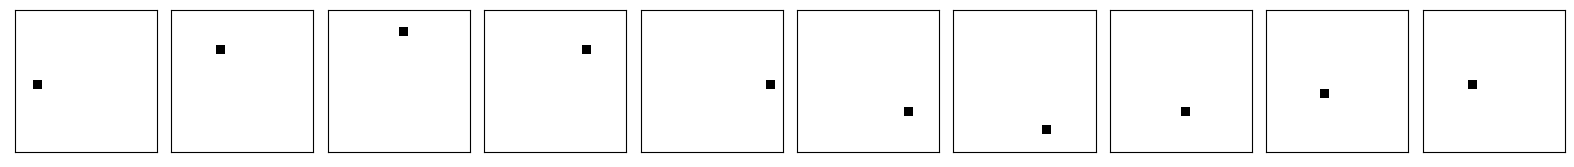

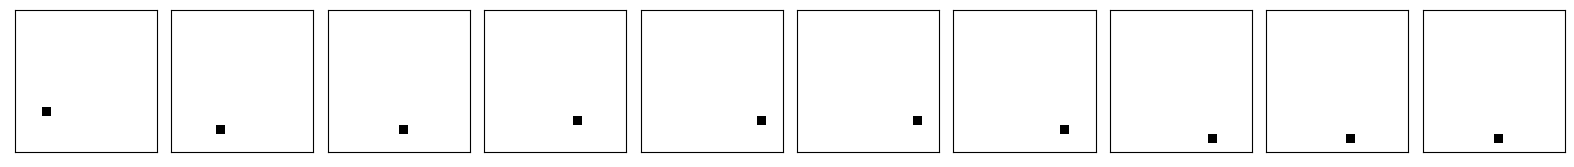

In [36]:
for _ in range(10):
    sequence, positions = generate_random_sequence(
        sequence_length=10,
        speed_min=10,
        speed_max=15,
        direction_min=0,
        direction_max=2 * np.pi,
        position_x_min=0,
        position_x_max=16,
        position_y_min=0,
        position_y_max=16,
        gravity_min=1,
        gravity_max=3,
        restitution_min=0.5,
        restitution_max=0.8,
    )
    display_sequence(sequence)

In [ ]:
# Hyperparameters
N = 1000  # Number of sequences
L = 10  # Length of each sequence
H, W = 16, 16  # Dimensions of the images


class PixelDataset(Dataset):
    def __init__(self, num_sequences, sequence_length):
        self.data = []
        self.targets = []
        for _ in range(num_sequences):
            images, positions = generate_random_sequence()
            self.data.append(images)  # Store the whole sequence
            self.targets.append(positions)  # Store all positions

        self.transform = transforms.ToTensor()
        self.sequence_length = sequence_length

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        # Transform and stack images to create a sequence
        sequence_of_images = [self.transform(image) for image in self.data[idx]]
        sequence_of_images = torch.stack(sequence_of_images)

        # Stack target positions
        target_positions = torch.FloatTensor(self.targets[idx])

        return sequence_of_images, target_positions


# Creating Dataset and DataLoader
dataset = PixelDataset(N, L)